## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Calculate the center of objects with Moments

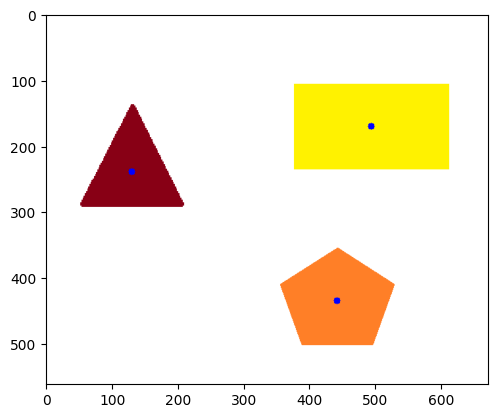

In [2]:
image = cv2.imread('images/shapes2.png')

# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Binarize image
_, binary_image = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for c in contours:
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.circle(image, (cx, cy), 5, (255,0,0), -1)

plt.imshow(image[...,::-1])

## 3- Calculate Area with contourArea and Sorting

Sorted contor Areas
[30315.0, 17775.0, 12794.5]


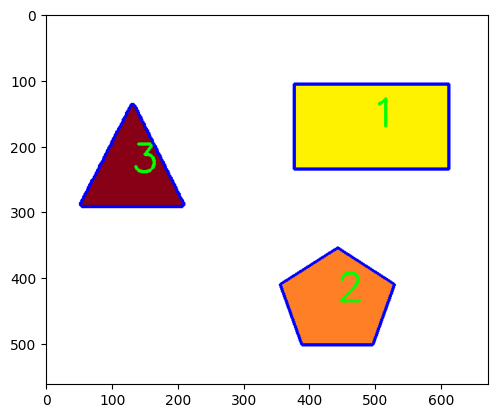

In [3]:
def get_contour_areas(contours):
    
    """returns the areas of all contours as list"""
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas


# Load our image
image = cv2.imread('images/shapes2.png')

# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Binarize image
_, binary_image = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("Sorted contor Areas") 
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(image, [c], -1, (255,0,0), 3)

plt.imshow(image[...,::-1])

## 4- Sorting Balloons

Sorted contor Areas
[11060.0, 3408.5, 3133.5, 1491.5, 337.5]


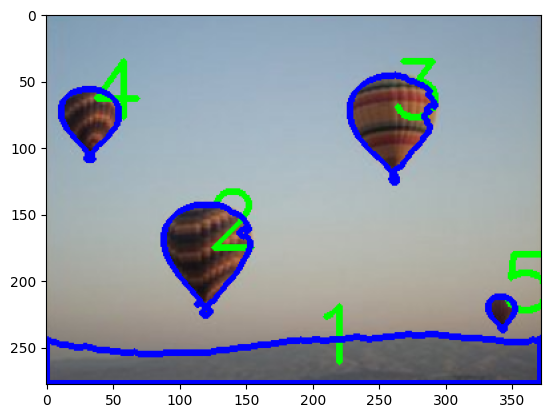

In [4]:
def get_contour_areas(contours):
    all_areas = []
    for cnt in contours:
        area = cv2.contourArea(cnt)
        all_areas.append(area)
    return all_areas

# Load our image
input_image = cv2.imread('images/balloon.png')

# convert image to grayscale
gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)         

# invert black and white
_, binary_image = cv2.threshold(gray_image,127,255,cv2.THRESH_BINARY_INV)


# Let's define our kernel size
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5), (2, 2))
closing = cv2.morphologyEx(binary_image, cv2.MORPH_CLOSE, kernel)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

# Sort contours large to small by area
sorted_contours = sorted(contours, key=cv2.contourArea, reverse=True)

print("Sorted contor Areas") 
print(get_contour_areas(sorted_contours))

# Iterate over our contours and draw one at a time
for (i,c) in enumerate(sorted_contours):
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(input_image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)
    cv2.drawContours(input_image, [c], -1, (255,0,0), 3)

plt.imshow(input_image[...,::-1])

## 5- Some Functions for Sorting

In [6]:
# Functions we'll use for sorting by position

def x_cord_contour(contours):
    
    """Returns the X cordinate for the contour centroid"""
    if cv2.contourArea(contours) > 10:
        M = cv2.moments(contours)
        return (int(M['m10']/M['m00']))
    else:
        pass
    
def label_contour_center(image, c):
    
    """Places a red circle on the centers of contours"""
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    
    # Draw the countour number on the image
    cv2.circle(image,(cx,cy), 10, (0,0,255), -1)
    return image

## 6- Sorting

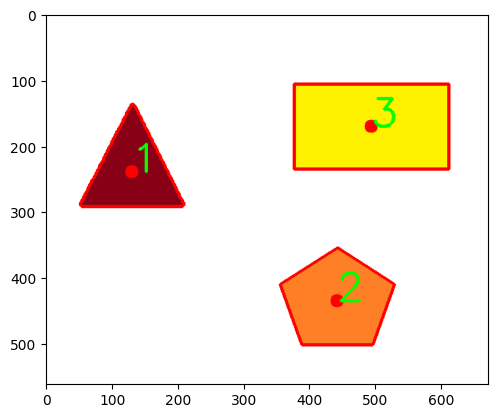

In [7]:
# Load our image
image = cv2.imread('images/shapes2.png')

# Grayscale our image
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Binarize image
_, binary_image = cv2.threshold(gray, 245, 255, cv2.THRESH_BINARY_INV)

# Find contours and print how many were found
contours, hierarchy = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


# Computer Center of Mass or centroids and draw them on our image
for (i, c) in enumerate(contours):
    orig = label_contour_center(image, c)
    
#Sort by left to right using our x_cord_contour function
contours_left_to_right = sorted(contours, key = x_cord_contour, reverse = False)

# Labeling Contours left to right
for (i,c)  in enumerate(contours_left_to_right):
    cv2.drawContours(image, [c], -1, (0,0,255), 3)  
    M = cv2.moments(c)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv2.putText(image, str(i+1), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 255, 0), 3)

plt.imshow(image[...,::-1])